In [172]:
import requests
from bs4 import BeautifulSoup as bs
import json
import pandas as pd
import seaborn as sb
import time

In [173]:
## checking the status of the url
url = 'https://store.steampowered.com/search/results/?query&start=0&count=50&dynamic_data=&sort_by=_ASC&supportedlang=english&snr=1_7_7_7000_7&filter=topsellers&infinite=1'
response = requests.get(url)
status = response.status_code
if status == 200:
    page = response.text
    soup = bs(page)
else:
    print(f"Recieved status code {status}")

In [174]:
# function that returns html data 

def ret_data(url):
  req = requests.get(url)
  data = dict(req.json())
  return data['results_html'] 

In [175]:
print(ret_data(url))


<!-- List Items -->

				<a href="https://store.steampowered.com/app/1938090/Call_of_Duty_Modern_Warfare_II/?snr=1_7_7_7000_150_1"
			 data-ds-appid="1938090" data-ds-itemkey="App_1938090" data-ds-tagids="[1663,19,1774,3859,4182,4168,3839]" data-ds-descids="[2,5]" data-ds-crtrids="[42355870,42356652]" onmouseover="GameHover( this, event, 'global_hover', {&quot;type&quot;:&quot;app&quot;,&quot;id&quot;:1938090,&quot;public&quot;:1,&quot;v6&quot;:1} );" onmouseout="HideGameHover( this, event, 'global_hover' )" class="search_result_row ds_collapse_flag "
		   data-search-page="1" data-gpnav="item"
		   data-ds-steam-deck-compat-handled="true">
            <div class="col search_capsule"><img src="https://cdn.cloudflare.steamstatic.com/steam/apps/1938090/capsule_sm_120.jpg?t=1668813907" srcset="https://cdn.cloudflare.steamstatic.com/steam/apps/1938090/capsule_sm_120.jpg?t=1668813907 1x, https://cdn.cloudflare.steamstatic.com/steam/apps/1938090/capsule_231x87.jpg?t=1668813907 2x"></div>
  

In [176]:
# function that parses html data in search for all a hrefs with a for loop that 
# checks span and div classes for 'title' and 'search_price'
# data is stored and appended to all_games.

def parse(data):
  all_games = []
  soup = bs(data, 'html.parser')
  games = soup.find_all('a')
  for game in games:
    title = game.find('span', {'class': 'title'}).text
    try:
      price = game.find('div', {'class': 'search_price'}).text.strip().split('$')[1]
    except:
      price = "Free to Play"
    try:
      discount_price = game.find('div', {'class': 'search_price'}).text.strip().split('$')[2]
    except:
      discount_price = price

    mygames = {
        'title': title,
        'price': price,
        'discounted price': discount_price
    }

    all_games.append(mygames)

  return all_games



In [177]:
data = ret_data(url)
parse(data)

[{'title': 'Call of Duty®: Modern Warfare® II',
  'price': '69.99',
  'discounted price': '69.99'},
 {'title': 'Warhammer 40,000: Darktide',
  'price': '39.99',
  'discounted price': '39.99'},
 {'title': 'Dead by Daylight', 'price': '19.99', 'discounted price': '7.99'},
 {'title': 'Evil West', 'price': '49.99', 'discounted price': '49.99'},
 {'title': 'Red Dead Redemption 2',
  'price': '59.99',
  'discounted price': '19.79'},
 {'title': 'Cyberpunk 2077', 'price': '59.99', 'discounted price': '29.99'},
 {'title': 'God of War', 'price': '49.99', 'discounted price': '37.49'},
 {'title': 'Apex Legends™',
  'price': 'Free to Play',
  'discounted price': 'Free to Play'},
 {'title': 'Lost Ark',
  'price': 'Free to Play',
  'discounted price': 'Free to Play'},
 {'title': 'Counter-Strike: Global Offensive',
  'price': 'Free to Play',
  'discounted price': 'Free to Play'},
 {'title': 'Sid Meier’s Civilization® VI',
  'price': '59.99',
  'discounted price': '5.99'},
 {'title': 'Persona 5 Royal',

In [178]:
# allows updated data to be concatenated/added to the original csv file
def output(results):
  g_df = pd.concat([pd.DataFrame(g) for g in results])
  g_df.to_csv('gameprices.csv', index=False)
  print('Saved as CSV')
  print(g_df.head())
  return

In [179]:
# a function for the total results
def t_results(url):
  req = requests.get(url)
  data = dict(req.json())
  total = data['total_count']
  return int(total)

## How many games are currently available in the steam store?

#### The code below displays the current total (changes depending on day, time used)

In [180]:
print(t_results(url))

9809


In [181]:
# the second param where '400' is can be replaced with t_results to scrape
# all available data from the steam top sellers page
results = []
for i in range(0, 400, 50):
  data = ret_data(f'https://store.steampowered.com/search/results/?query&start=0&count=50&dynamic_data=&sort_by=_ASC&supportedlang=english&snr=1_7_7_7000_7&filter=topsellers&infinite=1')
  results.append(parse(data))
  print('Info scraped: ', i)
  # adding sleep func to slow webscraper
  time.sleep(1.5)

Info scraped:  0
Info scraped:  50
Info scraped:  100
Info scraped:  150
Info scraped:  200
Info scraped:  250
Info scraped:  300
Info scraped:  350


In [182]:
#outputting results of scraped data + indication that data was saved to file
output(results)

Saved as CSV
                               title  price discounted price
0  Call of Duty®: Modern Warfare® II  69.99            69.99
1         Warhammer 40,000: Darktide  39.99            39.99
2                   Dead by Daylight  19.99             7.99
3                          Evil West  49.99            49.99
4              Red Dead Redemption 2  59.99            19.79


In [191]:
# storing gameprices in variable for data manipulation
g_data = pd.read_csv('gameprices.csv')

In [192]:
# displaying the data that was collected
g_data

,title,price,discounted price
0,Call of Duty®: Modern Warfare® II,69.99,69.99
1,"Warhammer 40,000: Darktide",39.99,39.99
2,Dead by Daylight,19.99,7.99
3,Evil West,49.99,49.99
4,Red Dead Redemption 2,59.99,19.79
...,...,...,...
395,Fallout 76: The Pitt,39.99,9.99
396,Total War: WARHAMMER II,59.99,20.39
397,American Truck Simulator,19.99,4.99
398,Battlefield™ 2042,59.99,19.79


# How many games for each available price range are currently being sold?

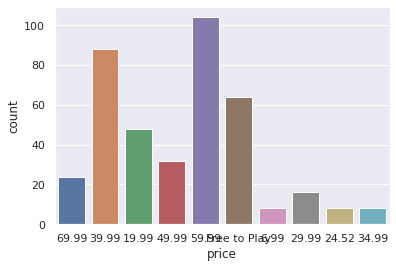

In [213]:
# this graph creates a count plot of the amount of games listed at each listed 
# price range.
sb.countplot(x='price', data=g_data)

# What are the top 5 best selling games as of 11/22?
## And which, if any, games are currently selling at a discounted price?

In [233]:
top_5 = g_data = pd.read_csv('gameprices.csv',nrows=6)
top_5

,title,price,discounted price
0,Call of Duty®: Modern Warfare® II,69.99,69.99
1,"Warhammer 40,000: Darktide",39.99,39.99
2,Dead by Daylight,19.99,7.99
3,Evil West,49.99,49.99
4,Red Dead Redemption 2,59.99,19.79
5,Cyberpunk 2077,59.99,29.99


#### Only 2 of the top 5 best selling games are on sale according to this table

# What are the price differences of the top 5 best selling games? 

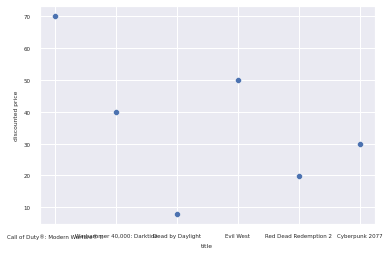

In [244]:
sb.set_theme(style='darkgrid')
sb.set(font_scale=0.5)
sb.scatterplot(x='title', y='discounted price', data=top_5)

## The top 5 best selling games and there associated pricing. From right to left
## the graph represents the number 1 best selling game to the #5 best selling game.
## The usefulness of this graph is that the csv file will update whenever the user
## chooses to run it again, displaying a different result depending upon when
## it is run.